In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


## Loading data & test train split

In [1]:
import pandas as pd
df = pd.read_csv("abalone.data", delimiter=",", names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", 
                "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]) 
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
#selection of dependent & independent variables
x=df.iloc[0:,1:]
y=df.iloc[0:,0]
#encoding categorical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = le.fit_transform(y)

In [3]:
#test train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.5, random_state=0)

In [4]:
# scaling dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train.shape)

(2088, 8)


## Poor model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt

In [ ]:
#Model development
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))  
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train, batch_size=50,epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.4817 - loss: 0.9301 - val_accuracy: 0.5606 - val_loss: 0.8573
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5602 - loss: 0.8632 - val_accuracy: 0.5448 - val_loss: 0.8617
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5357 - loss: 0.8492 - val_accuracy: 0.5634 - val_loss: 0.8506
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5663 - loss: 0.8188 - val_accuracy: 0.5716 - val_loss: 0.8457
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5589 - loss: 0.8564 - val_accuracy: 0.5486 - val_loss: 0.8561
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5525 - loss: 0.8327 - val_accuracy: 0.5653 - val_loss: 0.8642
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5610 - loss: 0.8219 - val_accuracy: 0.5572 - val_loss: 0.8683
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5788 - loss: 0.8270 - val_accuracy: 0.

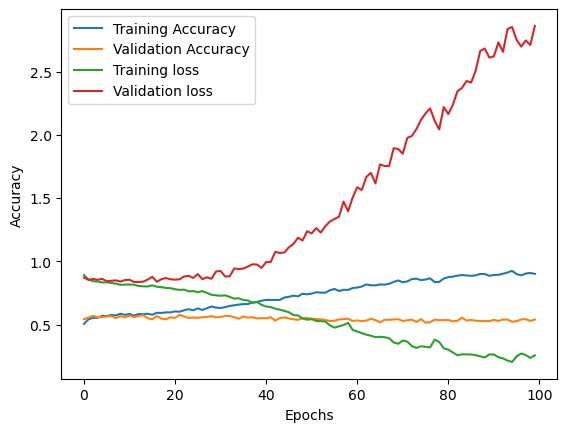

In [111]:
# Graph plot
import matplotlib.pyplot as plt
plt.plot(ann.history.history['accuracy'], label='Training Accuracy')
plt.plot(ann.history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(ann.history.history['loss'], label='Training loss')
plt.plot(ann.history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('abalone-b.png')  # Save the graph
plt.show()

In [112]:
print(ann.optimizer.get_config())


{'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


## Good model

In [113]:
#Model development
def model(hp):
    ann = tf.keras.models.Sequential()

    # Hyperparameters
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')
    l2_regularizer = hp.Float('l2_regularizer', min_value=0.0001, max_value=0.01, step=0.001)
    kernel_initializer = hp.Choice('kernel_initializer', values=['he_uniform', 'glorot_uniform', 'lecun_normal'])
    activation = hp.Choice('activation', values=['relu', 'tanh', 'LeakyReLU'])

    # input layer
    ann.add(tf.keras.layers.Input(shape=(x_train.shape[1],)
    ))
    #first hidden layer
    ann.add(tf.keras.layers.BatchNormalization())
    ann.add(tf.keras.layers.Dense(256,kernel_initializer=kernel_initializer, activation=activation,
        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)        
    ))
    #second hidden layer
    ann.add(tf.keras.layers.BatchNormalization())
    ann.add(tf.keras.layers.Dense(128,kernel_initializer=kernel_initializer,activation=activation,
        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)
    ))
    #Third hidden layer
    ann.add(tf.keras.layers.BatchNormalization())
    ann.add(tf.keras.layers.Dense(64,kernel_initializer=kernel_initializer,activation=activation,
        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)
    ))
    #output layer
    ann.add(tf.keras.layers.BatchNormalization())
    ann.add(tf.keras.layers.Dense(3,kernel_initializer=kernel_initializer, activation='softmax',
        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)
    ))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    ann.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return ann

# Create the tuner with 10 trials and save in folder
tuner = kt.RandomSearch(
    model,  
    objective='val_loss',  
    max_trials=10, 
    directory='abalone1'
    )

# Perform hyperparameter tuning
tuner.search(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Trial 10 Complete [00h 00m 03s]

Best val_loss So Far: 0.8620277643203735
Total elapsed time: 00h 05m 30s


In [114]:
#best hyperparemeters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'learning_rate': 0.003815967818424276,
 'l2_regularizer': 0.0031,
 'kernel_initializer': 'lecun_normal',
 'activation': 'tanh'}

In [119]:
# best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.optimizer.get_config()

{'name': 'adam',
 'learning_rate': 0.003815967822447419,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [120]:
# evaluate model
val_loss, val_accuracy = best_model.evaluate(x_test, y_test)
print("\nBest Model Validation Accuracy:", val_accuracy)
print("\nBest Model Validation Loss:", val_loss)  

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5518 - loss: 0.8575

Best Model Validation Accuracy: 0.5576831102371216

Best Model Validation Loss: 0.8620277643203735


## Best Model History

In [117]:
history_best = best_model.fit( x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5362 - loss: 0.8742 - val_accuracy: 0.5251 - val_loss: 0.9426
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5445 - loss: 0.8641 - val_accuracy: 0.5457 - val_loss: 0.9335
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5284 - loss: 0.8891 - val_accuracy: 0.5500 - val_loss: 0.8845
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5344 - loss: 0.8758 - val_accuracy: 0.5462 - val_loss: 0.8920
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5154 - loss: 0.9087 - val_accuracy: 0.5505 - val_loss: 0.8906
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5500 - loss: 0.8803 - val_accuracy: 0.5524 - val_loss: 0.9195
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5284 - loss: 0.8689 - val_accuracy: 0.5495 - val_loss: 0.8836
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5227 - loss: 0.8755 - val_accuracy: 0.5529 - v

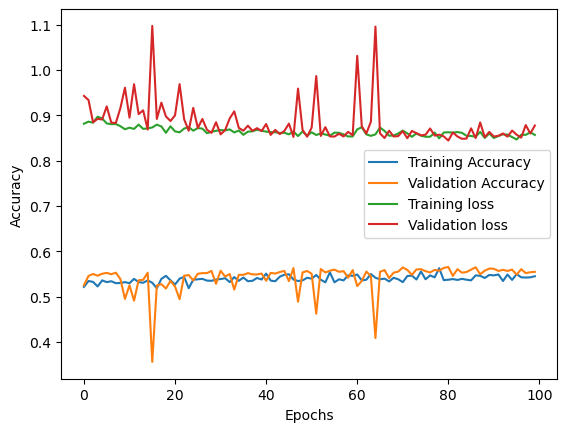

In [118]:
#graph plot
import matplotlib.pyplot as plt
plt.plot(best_model.history.history['accuracy'], label='Training Accuracy')
plt.plot(best_model.history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(best_model.history.history['loss'], label='Training loss')
plt.plot(best_model.history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('abalone-c.png')  # Save the graph
plt.show()

In [14]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


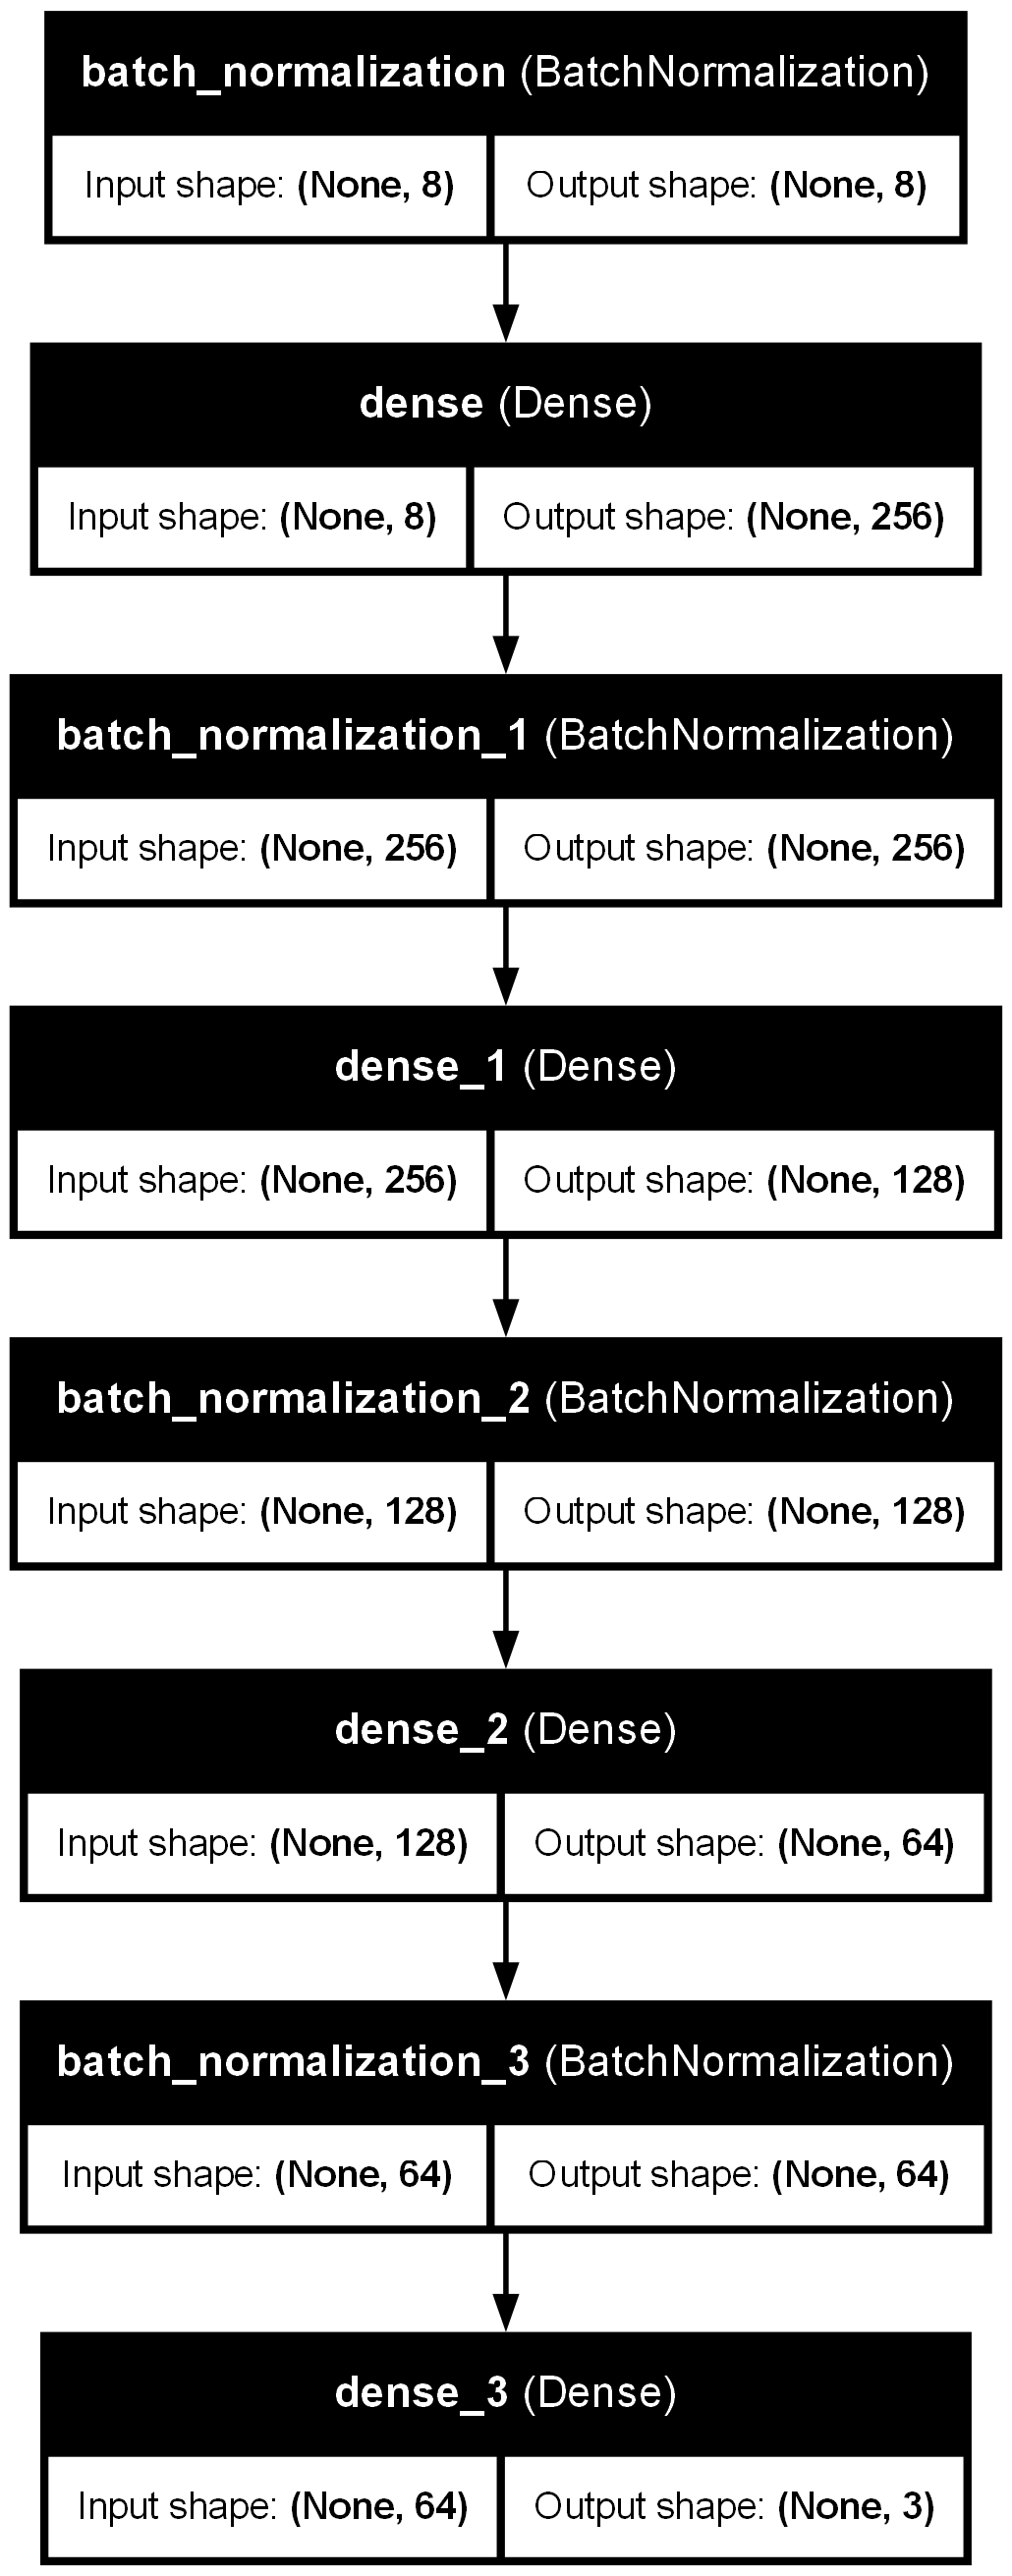

In [104]:
from tensorflow.keras.utils import plot_model
# poor model graph
plot_model(ann, to_file='abalone-db.png', show_shapes=True, show_layer_names=True)
# best model graph
plot_model(best_model, to_file='abalone-dc.png', show_shapes=True, show_layer_names=True)